In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from check_and_prepare_dataset import load_dataset
import numpy as np

In [2]:
def plot_spearman(dfcorr, tsize=(16,12), fsize=10):
    plt.figure(figsize = tsize)
    corr = dfcorr.corr(method = 'spearman')
    sns.heatmap(corr, annot = True, annot_kws={"size": fsize}, fmt='.2f')
    plt.show()

In [3]:
def plot_spearman_2(df1, df2, tsize=(16,12), fsize=10, titles=('new sampling','old sampling')):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = tsize, sharey=True)
    ax1.title.set_text(titles[0])
    ax2.title.set_text(titles[1])
                       
    corr1 = df1.corr(method = 'spearman')
    g1=sns.heatmap(corr1, ax=ax1, cbar=False, annot = True, annot_kws={"size": fsize}, fmt='.2f')
    g1.set_ylabel('')
    g1.set_xlabel('')

    corr2 = df2.corr(method = 'spearman')
    g2=sns.heatmap(corr2, ax=ax2, cbar=False, annot = True, annot_kws={"size": fsize}, fmt='.2f')
    g2.set_ylabel('')
    g2.set_xlabel('')

    plt.show()

In [6]:
df_train=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/train_new_sample_1_2.csv', dtype={'firedate':str})

In [455]:
df_train

,y,x,dom_dir,dom_vel,res_max,dir_max,max_dew_temp,min_dew_temp,mean_dew_temp,max_temp,...,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33,band,firedate
0,39.147559,25.935452,0.0,9.046390,9.046390,2.0,280.635254,278.464600,279.653748,290.534912,...,0.0,0.000000,0.330564,0.0,0.669436,0.000000,0.000000,0.000000,1,20161018
1,38.730052,21.884088,4.0,1.898232,1.898232,4.0,284.662842,278.752930,280.977692,294.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.407008,0.592992,0.000000,1,20180412
2,37.152804,22.368602,2.0,1.067671,1.067671,2.0,285.868896,280.009521,282.381348,296.207764,...,0.0,0.000000,0.315602,0.0,0.000000,0.684398,0.000000,0.000000,1,20161026
3,40.425852,22.894352,0.0,3.642635,3.642635,4.0,286.590820,285.130127,285.602997,292.597900,...,0.0,0.083100,0.000000,0.0,0.916900,0.000000,0.000000,0.000000,1,20151015
4,40.317610,23.353094,3.0,3.525212,3.525212,3.0,293.971680,291.457520,292.659790,300.970215,...,0.0,0.000000,0.793981,0.0,0.000000,0.000000,0.000000,0.206019,1,20100618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42263,40.704190,23.296395,8.0,1.491224,1.588163,4.0,286.177000,279.718020,283.816770,295.993160,...,0.0,0.217922,0.000000,0.0,0.000000,0.663003,0.119075,0.000000,1,20181011
42264,40.704190,23.301550,8.0,1.491224,1.588163,4.0,286.177000,279.718020,283.816770,295.993160,...,0.0,0.009555,0.000000,0.0,0.000000,0.990445,0.000000,0.000000,1,20181011
42265,40.704190,23.306704,8.0,1.491224,1.588163,4.0,286.177000,279.718020,283.816770,295.993160,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1,20181011
42266,40.709345,23.296395,8.0,1.491224,1.588163,4.0,286.177000,279.718020,283.816770,295.993160,...,0.0,0.977667,0.000000,0.0,0.000000,0.022333,0.000000,0.000000,1,20181011


In [419]:
df_train.columns

Index(['y', 'x', 'dom_dir', 'dom_vel', 'res_max', 'dir_max', 'max_dew_temp',
       'min_dew_temp', 'mean_dew_temp', 'max_temp', 'min_temp', 'mean_temp',
       'rain_7_days', 'ndvi', 'evi', 'lst_day', 'lst_night', 'fire', 'weekday',
       'month', 'pop', 'slope', 'road_dens', 'dem', 'aspect', 'f81',
       'frequency', 'corine_13', 'corine_4', 'corine_30', 'corine_38',
       'corine_36', 'corine_10', 'corine_20', 'corine_18', 'corine_16',
       'corine_43', 'corine_27', 'corine_5', 'corine_31', 'corine_17',
       'corine_12', 'corine_26', 'corine_37', 'corine_24', 'corine_28',
       'corine_29', 'corine_19', 'corine_21', 'corine_6', 'corine_23',
       'corine_22', 'corine_1', 'corine_8', 'corine_33', 'corine_2',
       'corine_40', 'corine_32', 'corine_41', 'corine_3', 'corine_25',
       'corine_35', 'corine_14', 'corine_42', 'corine_11', 'corine_44',
       'corine_15', 'corine_7', 'corine_9', 'corine_gr1', 'corine_gr4',
       'corine_gr5', 'corine_gr21', 'corine_gr22', 'cori

In [16]:
X_pd, y_pd, groups_pd = load_dataset('/mnt/nvme2tb/ffp/datasets/train/fires_new_norm.csv',['bin'])

Loading full dataset /mnt/nvme2tb/ffp/datasets/train/fires_new_norm.csv
before nan drop: 26604
after nan drop: 26604
after dup. drop: 26517
renaming "x": "xpos", "y": "ypos"
Ignored columns from csv ['Unnamed: 0', 'dom_dir', 'dir_max', 'fire', 'weekday', 'month', 'x', 'y', 'firedate', 'band']
Dropped columns ['bin_dom_dir_1', 'bin_month_8', 'bin_month_4', 'bin_month_7', 'bin_month_3', 'bin_corine_gr23', 'bin_dir_max_8', 'bin_dir_max_6', 'bin_weekday_7', 'bin_corine_gr21', 'bin_corine_gr33', 'bin_dir_max_2', 'bin_dom_dir_7', 'bin_dom_dir_5', 'bin_month_10', 'bin_dir_max_1', 'bin_corine_gr4', 'bin_weekday_1', 'bin_dom_dir_3', 'bin_weekday_6', 'bin_weekday_3', 'bin_corine_gr32', 'bin_month_6', 'bin_dir_max_4', 'bin_corine_gr24', 'bin_dom_dir_2', 'bin_month_5', 'bin_corine_gr1', 'bin_dir_max_3', 'bin_weekday_5', 'bin_dom_dir_8', 'bin_dir_max_7', 'bin_dir_max_5', 'bin_month_9', 'bin_corine_gr22', 'bin_weekday_4', 'bin_weekday_2', 'bin_corine_gr31', 'bin_dom_dir_4', 'bin_corine_gr5', 'bin_do

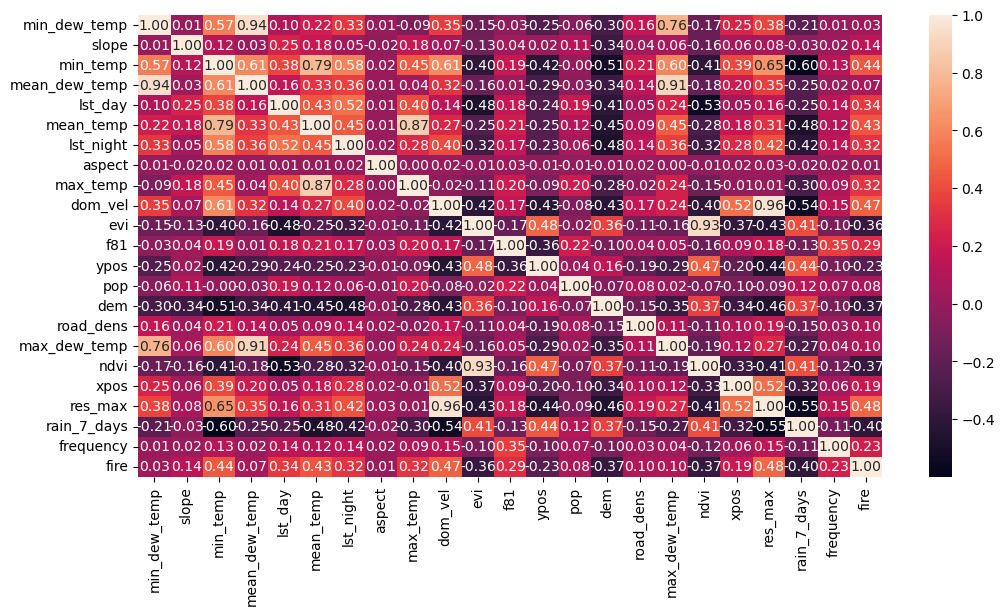

In [8]:
dfcorr=pd.concat([X_pd,y_pd], axis=1)
plot_spearman(dfcorr, tsize=(12,6))

In [423]:
tt=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/train_new_sample_1_2.csv')
len(tt[tt['fire']==1]['fire'])

14322

Loading full dataset /mnt/nvme2tb/ffp/datasets/train/train_new_sample_1_2_norm.csv
before nan drop: 41771
after nan drop: 41771
after dup. drop: 41684
renaming "x": "xpos", "y": "ypos"
Ignored columns from csv ['index', 'y', 'x', 'dom_dir', 'dir_max', 'fire', 'weekday', 'month', 'band', 'firedate']
Dropped columns ['bin_corine_19', 'bin_corine_4', 'bin_corine_10', 'bin_corine_22', 'bin_corine_8', 'bin_corine_5', 'bin_corine_gr21', 'bin_corine_17', 'bin_corine_33', 'bin_dir_max_2', 'bin_dom_dir_5', 'bin_month_10', 'bin_corine_15', 'bin_weekday_1', 'bin_dom_dir_3', 'bin_weekday_3', 'bin_month_6', 'bin_corine_7', 'bin_dir_max_4', 'bin_corine_gr24', 'bin_corine_29', 'bin_month_5', 'bin_dir_max_3', 'bin_corine_1', 'bin_dom_dir_8', 'bin_dir_max_5', 'bin_corine_40', 'bin_month_9', 'bin_corine_gr22', 'bin_weekday_4', 'bin_corine_gr31', 'bin_corine_42', 'bin_corine_28', 'bin_corine_26', 'bin_dom_dir_6', 'bin_corine_32', 'bin_dom_dir_1', 'bin_corine_31', 'bin_corine_23', 'bin_month_7', 'bin_mont

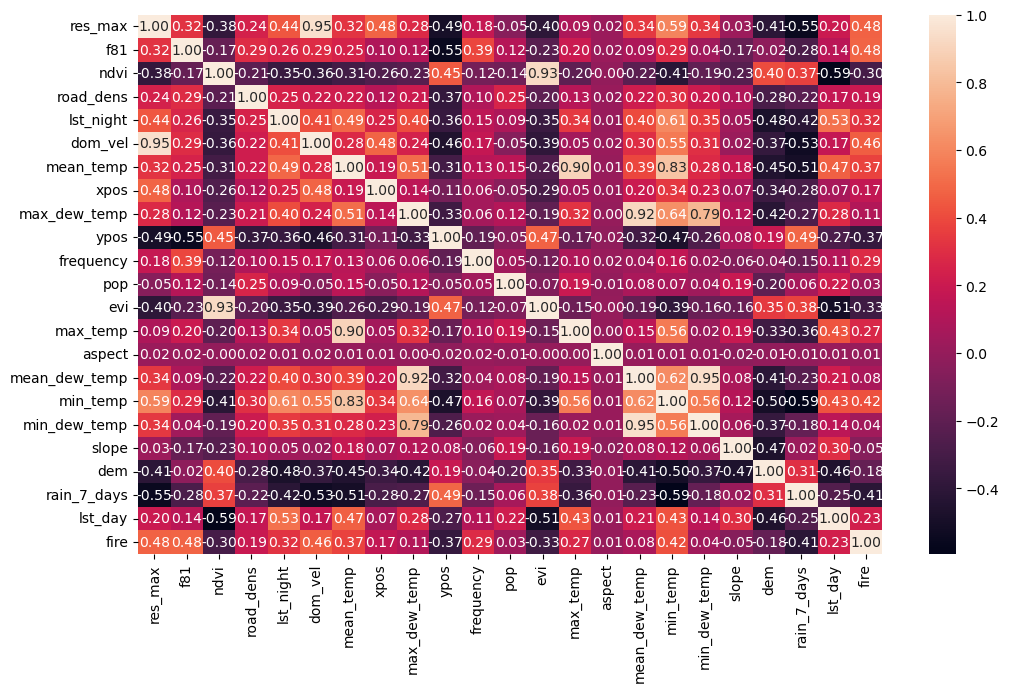

In [4]:
X_pd2=None
y_pd2=None
X_pd2, y_pd2, groups_pd = load_dataset('/mnt/nvme2tb/ffp/datasets/train/train_new_sample_1_2_norm.csv',['bin'])
dfcorr2=pd.concat([X_pd2, y_pd2], axis=1)
plot_spearman(dfcorr2, tsize=(12,7))

In [23]:
corr = dfcorr2.corr(method = 'spearman')
corr[(corr>0.8) & (corr!=1)]

,res_max,f81,ndvi,road_dens,lst_night,dom_vel,mean_temp,xpos,max_dew_temp,ypos,...,max_temp,aspect,mean_dew_temp,min_temp,min_dew_temp,slope,dem,rain_7_days,lst_day,fire
res_max,NaN,NaN,NaN,NaN,NaN,0.95353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_dens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lst_night,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dom_vel,0.95353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.898488,NaN,NaN,0.833307,NaN,NaN,NaN,NaN,NaN,NaN
xpos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_dew_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.918133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ypos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


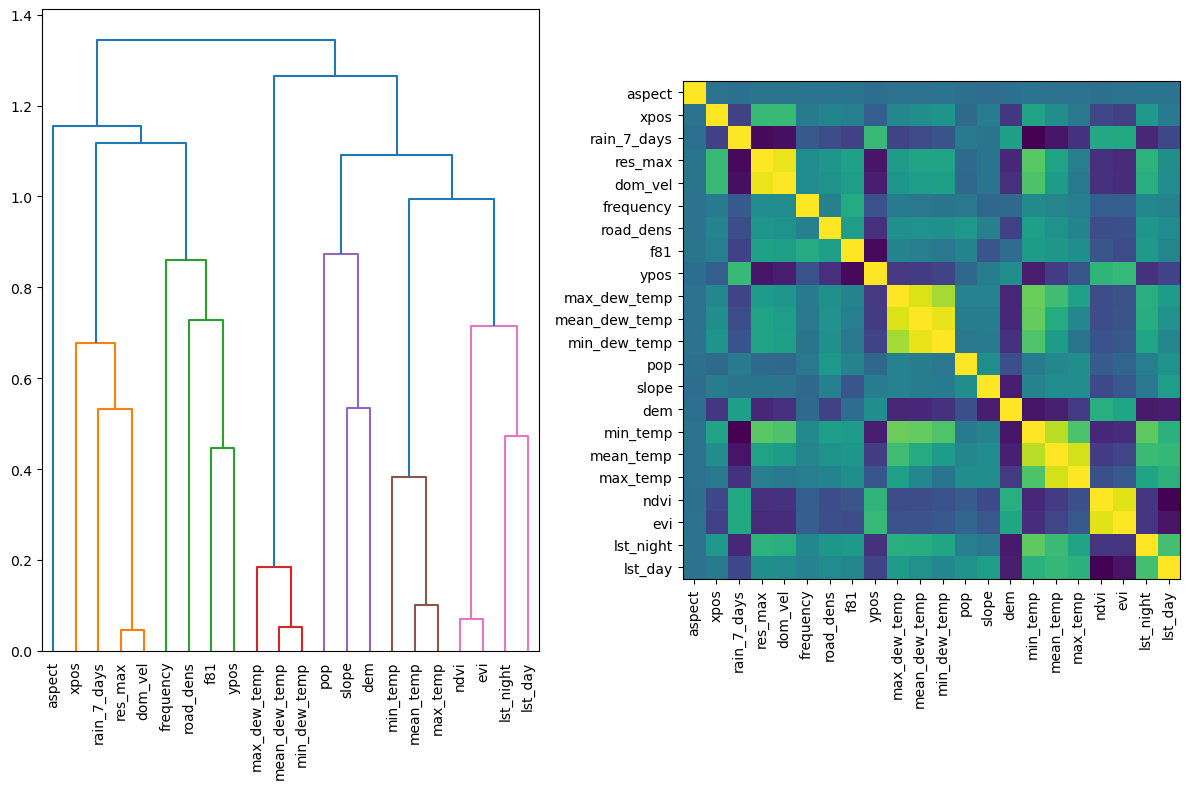

In [8]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X=X_pd2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [14]:
cluster_ids = hierarchy.fcluster(dist_linkage, 0.1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21]

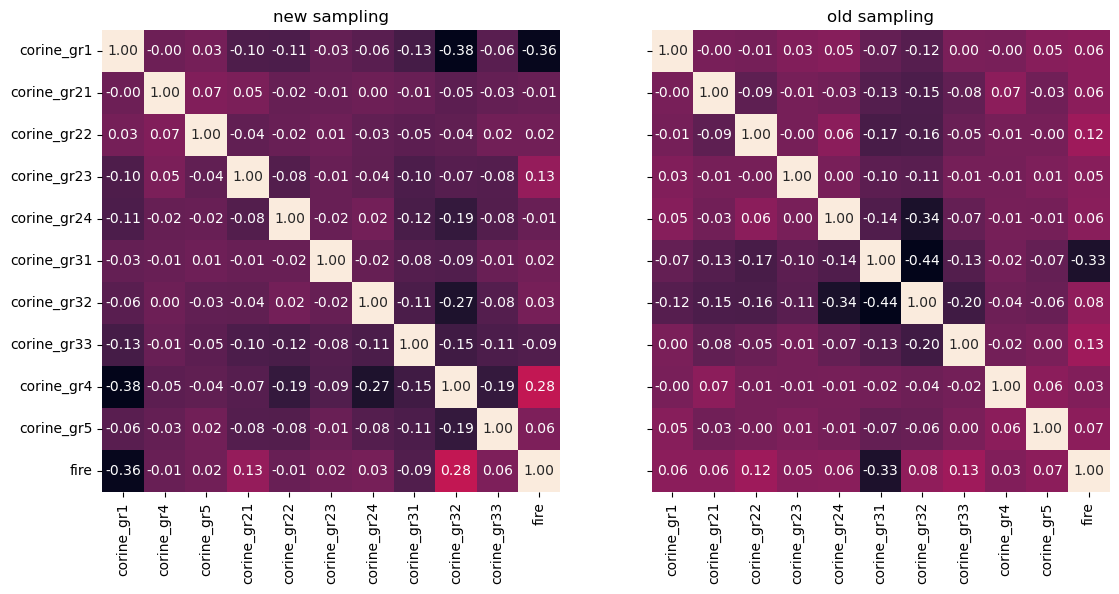

In [429]:
droppatt1=['dir', 'month', 'week', 'mean_', 'lst', 'max_', 'res_','rain','min_','pos','dom','evi', 'ndvi',
            'dem', 'frequency', 'pop','slope', 'aspect','f81', 'road', 'curvature','firedate', 'band', 'x', 'y'] \
           + ['corine_%d'%i for i in range(1,10)]
df_train=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/train_sample_1_1_nof_att.csv')
df_train.drop(columns=[c for c in df_train.columns if any([c.startswith(f) for f in droppatt1])], inplace=True)
df_train=df_train[[c for c in df_train.columns if c!='fire']+['fire']]

droppatt1o=['dir', 'month', 'week', 'mean_', 'lst', 'max_', 'res_','rain','min_','pos','dom','evi', 'ndvi',
            'dem', 'frequency', 'pop','slope', 'aspect','f81', 'road', 'curvature','firedate', 'band', 'x', 'y','Unnam'] \
           + ['corine_%d'%i for i in range(1,10)]
df_train_o1=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/traindataset_new.csv')
df_train_o1.drop(columns=[c for c in df_train_o1.columns if any([c.startswith(f) for f in droppatt1o])], inplace=True)
df_train_o1=df_train_o1[sorted([c for c in df_train_o1.columns if c!='fire'])+['fire']]

plot_spearman_2(df_train, df_train_o1, tsize=(13,6), fsize=10)

In [431]:
droppatt2=['dir', 'month', 'week', 'mean_', 'lst', 'max_', 'res_','rain','min_','pos','dom','evi', 'ndvi',
            'dem', 'frequency', 'pop','slope', 'aspect','f81', 'road', 'curvature','firedate', 'band', 'x', 'y'] \
           + ['corine_gr%d'%i for i in range(1,10)] + ['corine_%d'%i for i in range(12,45)]
df_train2=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/train_sample_1_1_nof_att.csv')
df_train2.drop(columns=[c for c in df_train2.columns if any([c.startswith(f) for f in droppatt2])], inplace=True)
df_train2=df_train2[sorted([c for c in df_train2.columns if c!='fire'])+['fire']]


droppatt2o=['dir', 'month', 'week', 'mean_', 'lst', 'max_', 'res_','rain','min_','pos','dom','evi', 'ndvi',
            'dem', 'frequency', 'pop','slope', 'aspect','f81', 'road', 'curvature','firedate', 'band', 'x', 'y','Unnam'] \
           + ['corine_gr%d'%i for i in range(1,10)] + ['corine_%d'%i for i in range(12,45)]
df_train_o2=pd.read_csv('/mnt/nvme2tb/ffp/datasets/train/traindataset_new.csv')
df_train_o2.drop(columns=[c for c in df_train_o2.columns if any([c.startswith(f) for f in droppatt2o])], inplace=True)
df_train_o2=df_train_o2[sorted([c for c in df_train_o2.columns if c!='fire'])+['fire']]

| Level 3                                          | Grid_Code |
|--------------------------------------------------|-----------|
| 1.1.1 Continuous urban fabric                    | 1         |
| 1.1.2 Discontinuous urban fabric                 | 2         |
| 1.2.1 Industrial or commercial units             | 3         |
| 1.2.2 Road and rail networks and associated land | 4         |
| 1.2.3 Port areas                                 | 5         |
| 1.2.4 Airports                                   | 6         |
| 1.3.1 Mineral extraction sites                   | 7         |
| 1.3.2 Dump sites                                 | 8         |
| 1.3.3 Construction sites                         | 9         |
| 1.4.1 Green urban areas                          | 10        |
| 1.4.2 Sport and leisure facilities               | 11        |

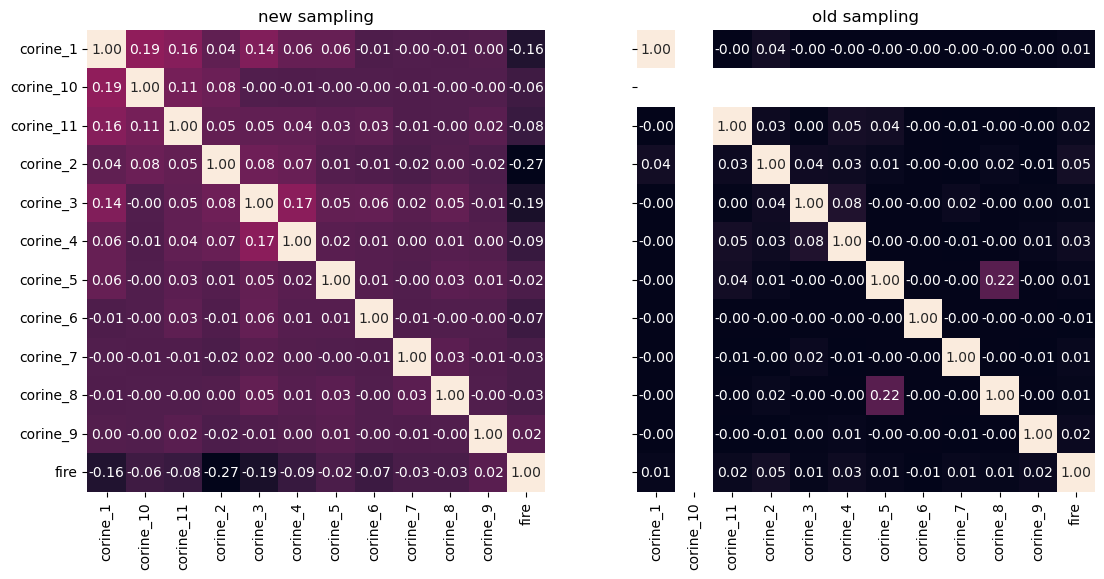

In [432]:
#dfcorr3=pd.concat([X_pd3,y_pd3], axis=1)
#plot_spearman(df_train2, (10,6), 9)
plot_spearman_2(df_train2, df_train_o2, tsize=(13,6), fsize=10)

In [433]:
dftrain=df_train

In [434]:
len(dftrain[(dftrain['corine_gr1']>0.6) & (dftrain['fire']==0)])

2630

In [435]:
len(dftrain[(dftrain['corine_gr1']>0.6) & (dftrain['fire']==1)])

140

In [436]:
len(dftrain[(dftrain['corine_gr1']<=0.1) & (dftrain['fire']==0)])

9783

In [437]:
len(dftrain[(dftrain['corine_gr1']<=0.1) & (dftrain['fire']==1)])

13718

In [438]:
len(dftrain[(dftrain['corine_gr1']>0.1) & (dftrain['corine_gr1']<=0.8)])

2561

In [439]:
len(dftrain[dftrain['fire']==1]), len(dftrain[dftrain['fire']==0])

(14322, 13956)